In [1]:
import cv2
import matplotlib.pyplot as plt



test Image Loading

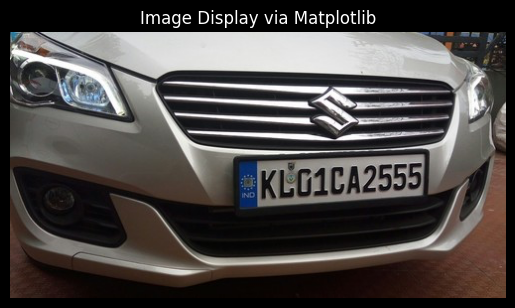

In [2]:

img = cv2.imread("test_image/Cars0.png")

def cv2img_via_plt_show(img):
    rgb  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title('Image Display via Matplotlib')
    plt.axis('off')  
    plt.show()

cv2img_via_plt_show(img)

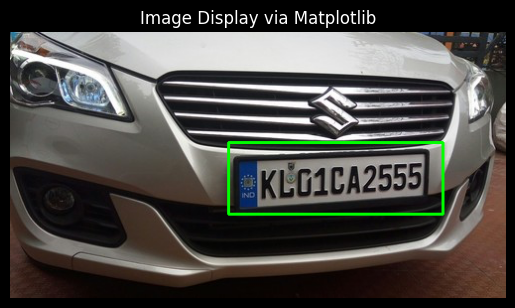

In [3]:
# Load Model Cascade Haar Feature Classifier
plate_cascade = cv2.CascadeClassifier("model/haarcascade_russian_plate_number.xml")

# img load
current_file_name = "test_image/Cars0.png"
img = cv2.imread(current_file_name)
 

def obj_detect(img, file_name  ,show=True):

    car_plate_set = [] 


    dir_crop = "car_plate"
    img_copy = img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) # Gray Scale Processing to image
    gray = cv2.equalizeHist(gray)   # histogram equalization Processing

    # Multiple Haar Object Model Detect , Return the Capture coordination of  Car plate Haar Feature Detection result

    
    plates = plate_cascade.detectMultiScale(
        gray,
        scaleFactor=1.05,
        minNeighbors=8,
        minSize=(90, 30),
        maxSize=(400, 150),
    )

    

    for (x, y, w, h) in plates:     # every coordination of detect result
        aspect_ratio = w / float(h)   # aspect_ratio  to judge reasonable shape
        roi = gray[y:y+h, x:x+w]      # License plate area extracted from grayscale image
        edges = cv2.Canny(roi, 100, 200) # Edge detection algorithm
        edge_density = edges.sum() / (w * h) # Density of edges



        if 2.0 < aspect_ratio < 6.0 and edge_density > 0.1:    # Conditional judgment whether it is a valid license plate area
            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

            cropped_img = img_copy[y:y+h, x:x+w]   # Extract and Crop sub image where is the car plate
            filename = f'{dir_crop}/{file_name[0:-4]}_{x}_{y}.jpg'
            cv2.imwrite(filename, cropped_img)
            car_plate_set.append(cropped_img)
            

    if show:
        cv2img_via_plt_show(img_copy)

    return img_copy , car_plate_set


labeled_image , car_plate_set   =  obj_detect( img , current_file_name )
print('\n')

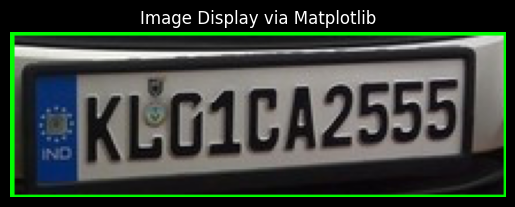

In [4]:
cv2img_via_plt_show(car_plate_set[0])